# 6.2 Regresión Lineal Múltiple México

## Lucía castañeda
## A01706644

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Evaluación1_México.csv')
df.head(5)

<ipython-input-3-fee3736a50cd>:1: DtypeWarning: Columns (1,3,10,36,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Evaluación1_México.csv')


,0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2056638,https://www.airbnb.com/rooms/2056638,2.02E+13,30/03/23,city0scrape,Amplio0y0luminoso0loft0en0Coyoacán,Cómodo0loft0de0dos0pisos0magníficamente0ubicad...,0,https://a0.muscache.com/pictures/28353712/4379...,...,4.95,5.00,4.86,0,f,3,3,0,0,0.19
1,1,2072354,https://www.airbnb.com/rooms/2072354,2.02E+13,30/03/23,city0scrape,Coyoacan0Historic0Studio0Apartment,This0studio0flat0is0adjacent0to0the0owner's0ho...,"Located0in0Coyoacan,0in0a0quiet0neighborhood0w...",https://a0.muscache.com/pictures/369f3371-593a...,...,5.00,4.95,4.84,0,f,2,2,0,0,0.54
2,2,696037,https://www.airbnb.com/rooms/696037,2.02E+13,29/03/23,city0scrape,"30Bedrooms,020blocks0from0Polanco0-0ALL0RENOVA...","Beautifully0decorated030bedroom0apartment,0it0...","This0area0is0called0Nuevo0Polanco,0it0has0bein...",https://a0.muscache.com/pictures/10960397/67b2...,...,4.92,4.58,4.71,0,f,3,3,0,0,0.31
3,3,35797,https://www.airbnb.com/rooms/35797,2.02E+13,29/03/23,city0scrape,Villa0Dante,"Dentro0de0Villa0un0estudio0de0arte0con0futon,0...","Centro0comercial0Santa0Fe,0parque0interlomas0y...",https://a0.muscache.com/pictures/f395ab78-1185...,...,4.80,4.80,4.70,0,f,1,1,0,0,1.70
4,4,44616,https://www.airbnb.com/rooms/44616,2.02E+13,30/03/23,city0scrape,CONDESA0HAUS0B&B,A0new0concept0of0hosting0in0mexico0through0a0b...,0,https://a0.muscache.com/pictures/251410/ec75fe...,...,4.78,4.98,4.48,0,f,12,3,2,0,0.46


In [4]:
# Seleccionar los tipos de habitaciones de interés
room_types = ["Entire home/apt", "Private room"]
data = df[df["room_type"].isin(room_types)]

host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating”

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

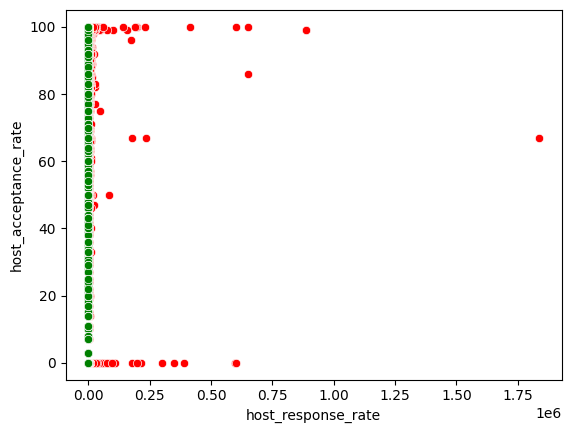

In [5]:
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=data)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=data)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=data)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="green", data=data)

In [6]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_response_rate', 'price','number_of_reviews', 'review_scores_rating']]
Var_Dep= df['host_acceptance_rate']

In [7]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [8]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [9]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [10]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 5.96431930e-01, -9.78451404e-06,  2.66106343e-02, -9.89640492e-01]),
 'rank_': 4,
 'singular_': array([2.83246538e+06, 9.89147723e+03, 5.47207541e+03, 7.41149818e+01]),
 'intercept_': 38.26236832589824}

**Modelo matemático: y= 5.96431930e-01x1 +-9.78451404e-06x2 + 2.66106343e-02x3 + -9.89640492e-01x4 + 38.26236832589824**

In [11]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.44983074840468773

“Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“

<Axes: xlabel='availability_365', ylabel='price'>

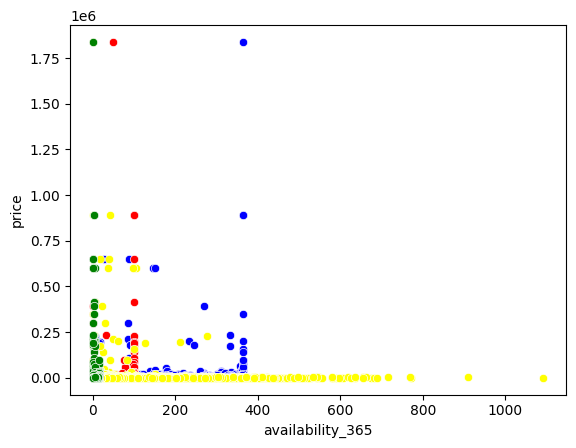

In [12]:
from turtle import color


sns.scatterplot(x='availability_365', y='price', color="blue", data=data)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=data)
sns.scatterplot(x='number_of_reviews', y='price', color="yellow", data=data)
sns.scatterplot(x='accommodates', y='price', color="green", data=data)

In [13]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['availability_365', 'host_response_rate','number_of_reviews', 'accommodates']]
Var_Dep= df['price']

In [14]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [15]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [16]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [17]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 5.39736783e-02, -1.47099185e+01, -5.40955021e-01,  3.85328223e+02]),
 'rank_': 4,
 'singular_': array([19299.73302163,  9883.17127583,  5442.25971711,   342.57923475]),
 'intercept_': 1858.8451130686879}

**Modelo matemático: y= 5.39736783e-02x1 +  -1.47099185e+01x2 + -5.40955021e-01x3 + 3.85328223e+02x4 + 1858.8451130686879**

In [18]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.002741677227091621

host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication 

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

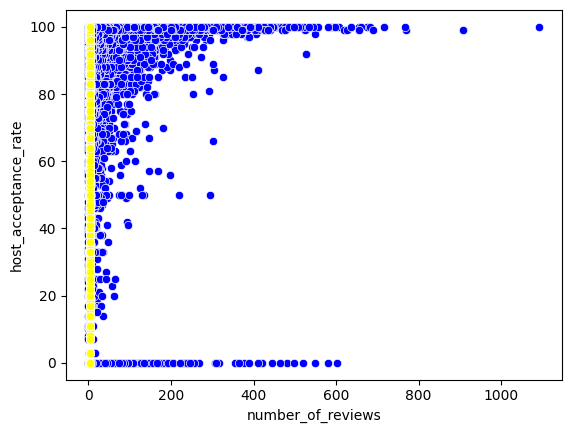

In [19]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=data)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=data)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=data)

In [20]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= df['host_acceptance_rate']

In [21]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [22]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [23]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [24]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.07823296,  5.88354653, -3.02476065]),
 'rank_': 3,
 'singular_': array([9832.54436466,   83.27810906,   33.04981464]),
 'intercept_': 67.54921280067005}

**Modelo matemático: y= 0.07823296x1 + 5.88354653x2 + -3.02476065x3 + 67.54921280067005**

In [25]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.02780608965464626

In [31]:
# Seleccionar los tipos de habitaciones y las variables de interés
room_types = ["Entire home/apt", "Private room"]
variables = ["host_acceptance_rate", "host_response_rate", "review_scores_rating", 
             "price", "availability_365", "number_of_reviews", "review_scores_cleanliness",
             "review_scores_communication"]

# Crear una tabla para almacenar los coeficientes de determinación y correlación
results = pd.DataFrame(columns=["room_type", "variable", "r2", "corr"])

# Calcular los coeficientes de determinación y correlación para todas las combinaciones posibles
for room_type in room_types:
    for variable in variables:
        # Seleccionar los datos correspondientes al tipo de habitación y la variable de interés
        data_subset = data[data["room_type"] == room_type][[variable, "number_of_reviews"]].dropna()
        
        # Crear el modelo de regresión lineal y calcular los coeficientes de determinación y correlación
        if len(data_subset) > 0:
            X = data_subset[variable].values.reshape(-1, 1)
            y = data_subset["number_of_reviews"].values.reshape(-1, 1)
            model = LinearRegression().fit(X, y)
            r2 = model.score(X, y)
            corr = data_subset.corr().iloc[0,1]
            
            # Agregar los resultados a la tabla
            results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)

# Imprimir la tabla de resultados
print(results)

<ipython-input-31-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)
<ipython-input-31-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)
<ipython-input-31-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)
<ipython-input-31-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

          room_type                     variable        r2      corr
0   Entire home/apt         host_acceptance_rate  0.017911  0.133834
1   Entire home/apt           host_response_rate  0.017009  0.130417
2   Entire home/apt         review_scores_rating  0.007636  0.087385
3   Entire home/apt                        price  0.000234 -0.015287
4   Entire home/apt             availability_365  0.001050 -0.032399
5   Entire home/apt            number_of_reviews  1.000000  1.000000
6   Entire home/apt    review_scores_cleanliness  0.009321  0.096543
7   Entire home/apt  review_scores_communication  0.008340  0.091323
8      Private room         host_acceptance_rate  0.025599  0.159997
9      Private room           host_response_rate  0.028860  0.169883
10     Private room         review_scores_rating  0.005004  0.070736
11     Private room                        price  0.000021  0.004614
12     Private room             availability_365  0.001886 -0.043432
13     Private room            num

<ipython-input-31-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)
<ipython-input-31-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)
<ipython-input-31-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)
